#Project Summary:
The primary goal of this project was to build a recommendation engine using the Surprise library, aimed at analyzing user activity patterns and providing personalized movie recommendations on a platform like Netflix.

Step1: Install the suprise library

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505176 sha256=3a731e95cde5fb711d21c447b866743851e5db4de5a55836b00113f9e033fcae
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


Step2: Required Linraries

In [49]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

Step3 : Load the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Load combined data
netflix_data = pd.read_csv('/content/drive/MyDrive/Dataset/combined_data_1.txt',header= None,names = ['cust_id',"Rating"], usecols=[0,1])

In [52]:
netflix_data

,cust_id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [8]:
#get the count of movies with the help of customer
netflix_data.isnull().sum()

,0
cust_id,0
Rating,4499


In [9]:
movie_count = netflix_data.isnull().sum()
movie_count = movie_count["Rating"]
movie_count

4499

In [53]:
total_count = netflix_data["cust_id"].nunique()
total_count

475257

In [54]:
customer_count = total_count - movie_count
customer_count

470758

In [55]:
#calculate how many ratings that are given by user
rating_count =netflix_data["cust_id"].count()-movie_count
rating_count


24053764

In [56]:
stars = netflix_data.groupby('Rating')["Rating"].agg(["count"])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


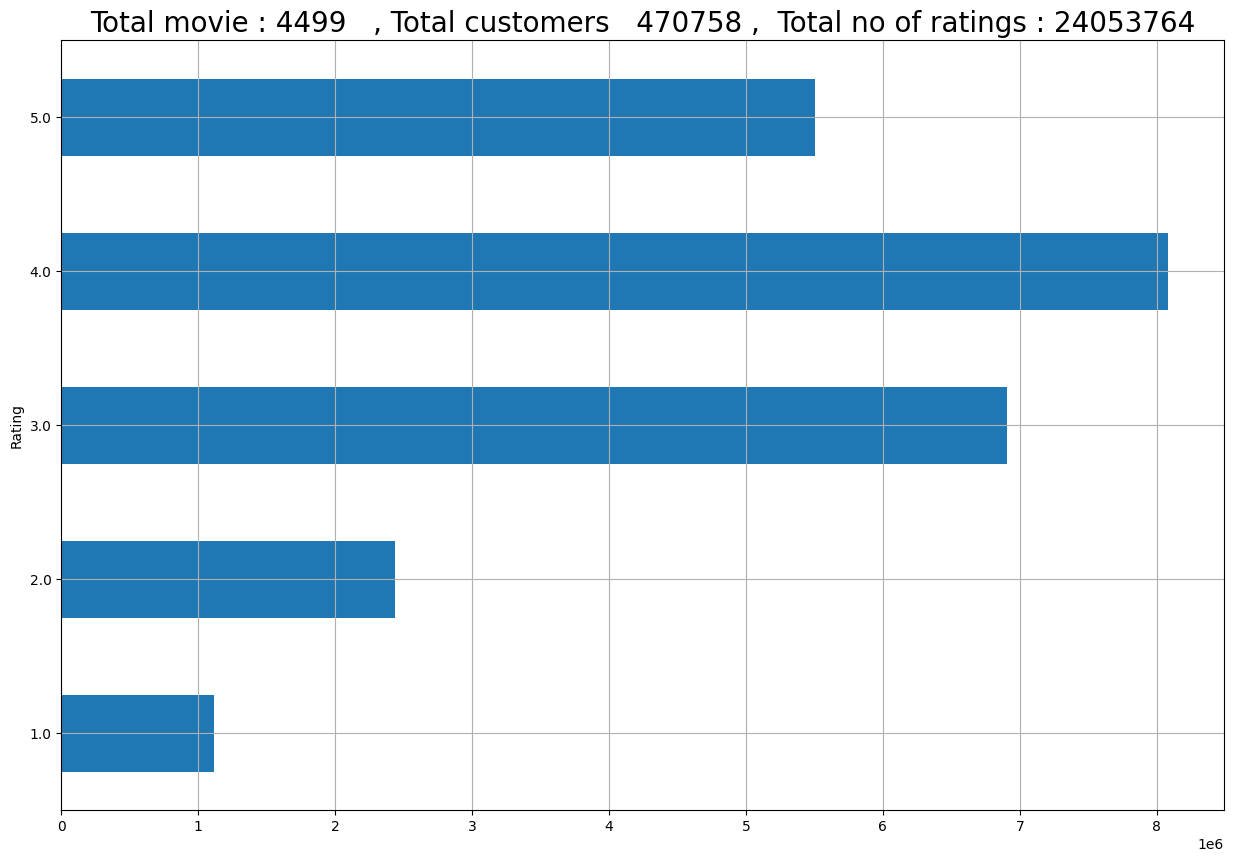

In [57]:
ax= stars.plot(kind="barh",legend=False , figsize=(15,10))
plt.title(f'Total movie : {movie_count}   , Total customers   {customer_count} ,  Total no of ratings : {rating_count}', fontsize=20)
plt.grid(True)
plt.show()

In [58]:
movie_id=None
movie_np = [ ]  # Empty list to store all movie id

for i in netflix_data["cust_id"]:
  if ":" in i:
    # Update the current movie ID in column
    movie_id = int(i.replace(":" , ''))         # removing : from number
  movie_np.append(movie_id) # Adding movie id number in the list

In [59]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [60]:
netflix_data["Movie_id"]=movie_np

In [61]:
netflix_data

,cust_id,Rating,Movie_id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [62]:
netflix_data = netflix_data[netflix_data["Rating"].notna()]

In [63]:
netflix_data

,cust_id,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [66]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_id   object 
 1   Rating    float64
 2   Movie_id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [67]:
netflix_data["cust_id"]=netflix_data["cust_id"].astype(int)

<ipython-input-67-4b87ffe3d32f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data["cust_id"]=netflix_data["cust_id"].astype(int)


In [68]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_id   int64  
 1   Rating    float64
 2   Movie_id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [75]:
dataset_movie_summary = netflix_data.groupby("Movie_id")["Rating"].agg(["count"])

In [76]:
dataset_movie_summary

,count
Movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [77]:

movie_benchmark = round(dataset_movie_summary["count"].quantile(0.6),0)

movie_benchmark

908.0

In [79]:
drop_movie_list =dataset_movie_summary[dataset_movie_summary["count"] < movie_benchmark].index

In [73]:
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_id', length=2699)

In [80]:
len(drop_movie_list)

2699

In [81]:
dataset_cust_summary = netflix_data.groupby("cust_id")["Rating"].agg(["count"])
dataset_cust_summary

,count
cust_id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [82]:
cust_benchmark = round(dataset_cust_summary["count"].quantile(0.6),0)
cust_benchmark

36.0

In [83]:
drop_cust_list =dataset_cust_summary[dataset_cust_summary["count"] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='cust_id', length=282042)

In [84]:
len(drop_cust_list)

282042

In [85]:
netflix_data= netflix_data[~netflix_data["Movie_id"].isin(drop_movie_list)]
netflix_data= netflix_data[~netflix_data["cust_id"].isin(drop_cust_list)]

In [86]:
netflix_data

,cust_id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


Model Building

In [87]:
movies = pd.read_csv("/content/drive/MyDrive/Dataset/movie_titles.csv",encoding = "ISO-8859-1", header=None, names=['Movie_id','Year','Name'],usecols = [0,1,2])

In [88]:
movies

,Movie_id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [34]:
reader=Reader()

In [89]:
data = Dataset.load_from_df(netflix_data[["cust_id" , "Movie_id" , "Rating"]][ :100000] ,reader)

In [90]:
data

In [91]:
#create svd model
model = SVD()

In [92]:
cross_validate(model ,data , measures=["RMSE"],cv=3)

{'test_rmse': array([1.02324407, 1.01683655, 1.01789152]),
 'fit_time': (1.4875307083129883, 1.435744047164917, 2.008073329925537),
 'test_time': (0.41339898109436035, 0.1950702667236328, 0.2464141845703125)}

In [93]:
netflix_data

,cust_id,Rating,Movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


Recommnedations

In [94]:
#filtering the data for a specific user=1488844
user_rating =netflix_data[netflix_data["cust_id"]==1488844]
user_rating

,cust_id,Rating,Movie_id
5157,1488844,4.0,8
24369,1488844,2.0,17
93296,1488844,3.0,30
224788,1488844,3.0,44
262322,1488844,5.0,58
...,...,...,...
23953934,1488844,5.0,4479
23982076,1488844,2.0,4485
23985697,1488844,5.0,4488
24020180,1488844,3.0,4490


user has rated 513 movies

In [99]:
user_1488844 = movies.copy()

In [100]:
user_1488844

,Movie_id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [106]:
# Remove the less rates movies from 2nd dataset also
user_1488844 = user_1488844[~user_1488844["Movie_id"].isin(drop_movie_list)]

In [108]:
user_1488844

,Movie_id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


#Prediction

In [113]:
user_1488844["Estimated_Score"]= user_1488844["Movie_id"].apply(lambda x:model.predict(1488844 ,x).est)

In [114]:
user_1488844

,Movie_id,Year,Name,Estimated_Score
2,3,1997.0,Character,3.266833
4,5,2004.0,The Rise and Fall of ECW,3.814104
5,6,1997.0,Sick,2.954311
7,8,2004.0,What the #$*! Do We Know!?,3.620990
15,16,1996.0,Screamers,2.895044
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.665439
17766,17767,2004.0,Fidel Castro: American Experience,3.665439
17767,17768,2000.0,Epoch,3.665439
17768,17769,2003.0,The Company,3.665439


In [121]:
user=user_1488844.sort_values("Estimated_Score",ascending=False)

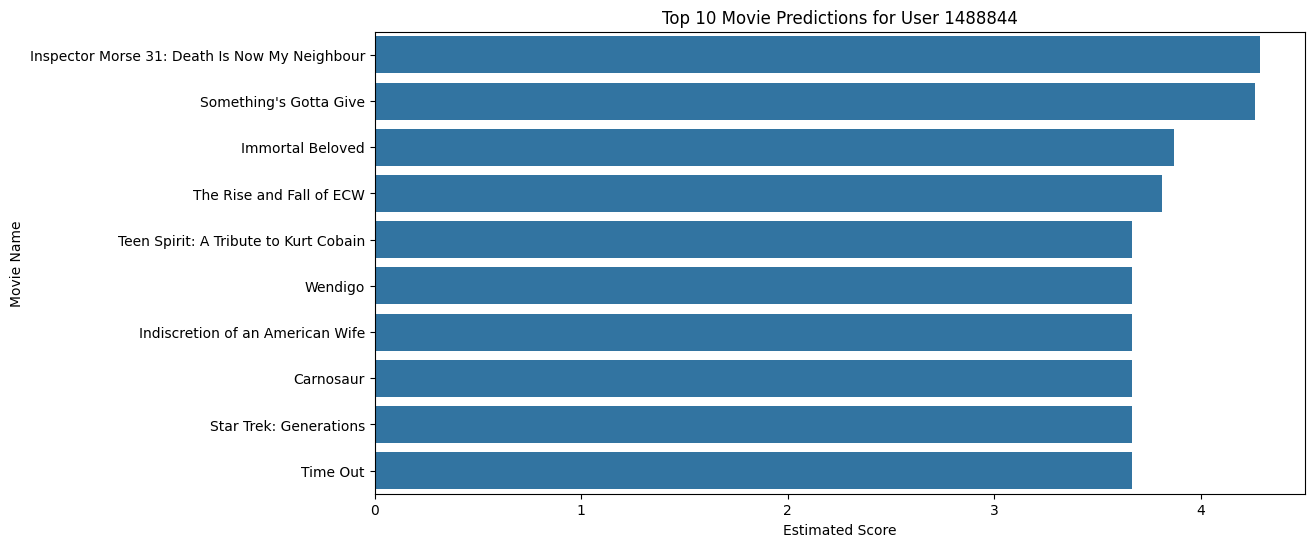

In [128]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated_Score', y='Name', data=user_1488844.sort_values("Estimated_Score", ascending=False).head(10))
plt.title('Top 10 Movie Predictions for User 1488844')
plt.xlabel('Estimated Score')
plt.ylabel('Movie Name')
plt.show()


In [125]:
user_1488844.head(10)

,Movie_id,Year,Name,Estimated_Score
2,3,1997.0,Character,3.266833
4,5,2004.0,The Rise and Fall of ECW,3.814104
5,6,1997.0,Sick,2.954311
7,8,2004.0,What the #$*! Do We Know!?,3.620990
15,16,1996.0,Screamers,2.895044
16,17,2005.0,7 Seconds,3.213418
17,18,1994.0,Immortal Beloved,3.868806
23,24,1981.0,My Bloody Valentine,3.108767
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.289389
25,26,2004.0,Never Die Alone,2.925344
